<a href="https://colab.research.google.com/github/harbenml/alpaka-detector/blob/main/alpaka_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 18.8MB/s 
     |████████████████████████████████| 1.2MB 49.9MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 194kB 57.0MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 12.8MB 242kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [3]:
!pip install bing-image-downloader

In [6]:
from bing_image_downloader import downloader
from fastbook import *
# from fastai.vision.all import *
from fastai.vision.widgets import *

In [7]:
downloader.download("alpaca", limit=150, output_dir='alpakas', adult_filter_off=True, force_replace=False, timeout=5)
downloader.download("sheep", limit=150, output_dir='alpakas', adult_filter_off=True, force_replace=False, timeout=5)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Alpaca_(31562329701).jpg/1200px-Alpaca_(31562329701).jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Alpaca_(31562329701).jpg/1200px-Alpaca_(31562329701).jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Alpaca_(31562329701).jpg/1200px-Alpaca_(31562329701).jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from https://i.redd.it/r6rrplylcj1z.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Rose_Hill_Farm_Alpaca_01.jpg/1200px-Rose_Hill_Farm_Alpaca_01.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-HHgZso8TpGM/UXN7mfbndXI/AAAAAAAACx0/h1ZMIoB_Y0s/s1600/Alpaca-Lovely-Animal.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogs

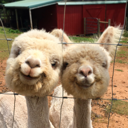

In [8]:
dest = 'alpakas/alpaca/Image_1.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
path = Path('alpakas')

In [10]:
fns = get_image_files(path)
fns

(#300) [Path('alpakas/alpaca/Image_52.jpg'),Path('alpakas/alpaca/Image_125.jpg'),Path('alpakas/alpaca/Image_63.jpg'),Path('alpakas/alpaca/Image_23.jpg'),Path('alpakas/alpaca/Image_10.jpg'),Path('alpakas/alpaca/Image_77.jpg'),Path('alpakas/alpaca/Image_68.jpg'),Path('alpakas/alpaca/Image_95.jpg'),Path('alpakas/alpaca/Image_105.jpg'),Path('alpakas/alpaca/Image_141.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [12]:
alpakas = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = alpakas.dataloaders(path)

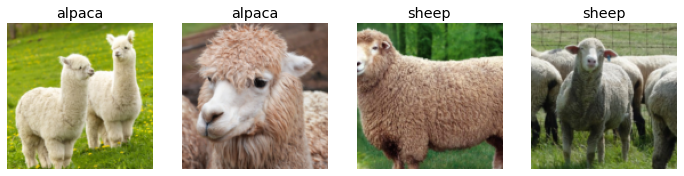

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
alpakas = alpakas.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = alpakas.dataloaders(path)

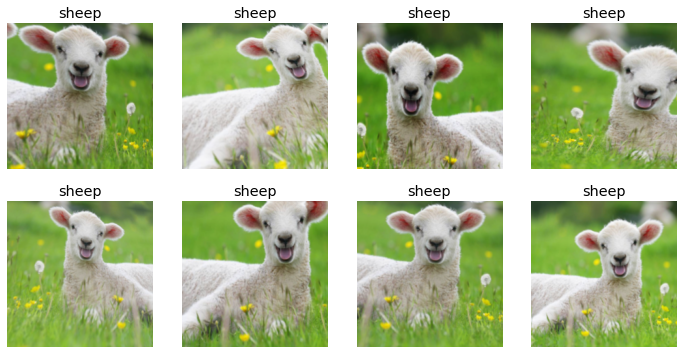

In [16]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


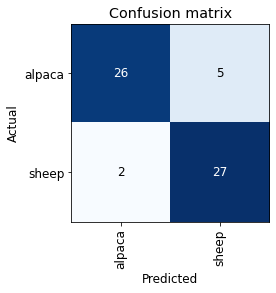

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

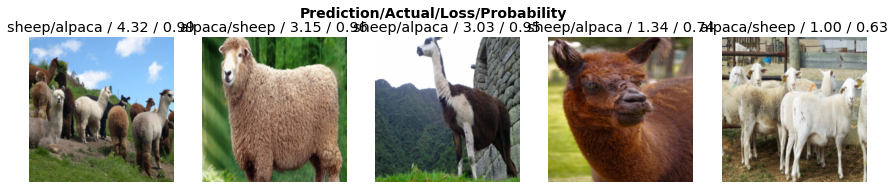

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Error: ignored

In [22]:
learn.export()